In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete, gamma

from base import HeterogeneousRenewalModel, PeriodicHeterogeneousRenewalModel

In [5]:
period = 365
time_vec = np.arange(period)
reproduction_no_vec = 2 + np.cos(2 * np.pi * (time_vec - 30) / period)

generation_time_max = 20
generation_time_vals = np.arange(1, generation_time_max + 1)
generation_time_probs = gamma.pdf(generation_time_vals, a=4, scale=5 / 4)
generation_time_probs /= generation_time_probs.sum()
generation_time_dist = rv_discrete(values=(generation_time_vals, generation_time_probs))

dispersion_param = 1.0

In [6]:
model = PeriodicHeterogeneousRenewalModel(
    time_vec=time_vec,
    reproduction_no_vec=reproduction_no_vec,
    generation_time_dist=generation_time_dist,
    dispersion_param=dispersion_param,
)

<BarContainer object of 13 artists>

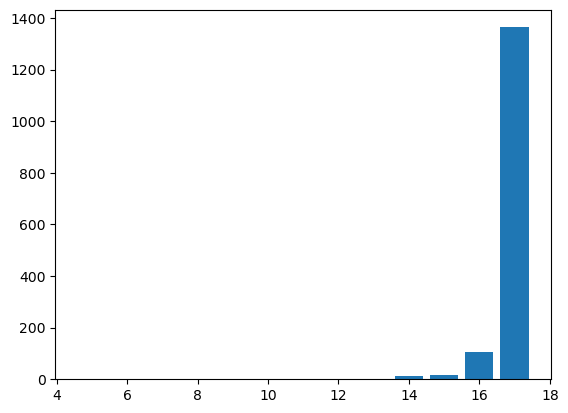

In [9]:
output = model.simulate(time_start=5)
plt.bar(output["time_vec"], output["incidence_vec"])

(0.0, 1.0)

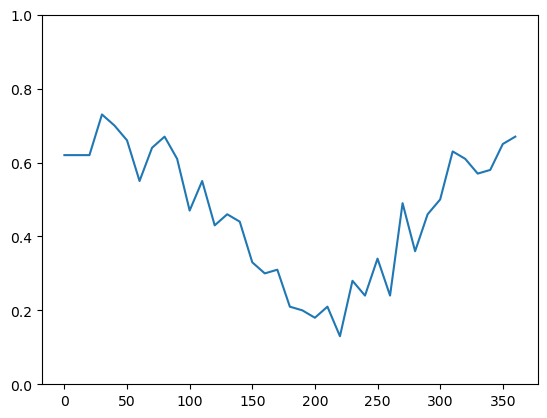

In [11]:
time_vec = np.arange(period, step=10)
sor_vec = model.simulated_outbreak_risk(time_vec, no_simulations=100)
plt.plot(time_vec, sor_vec)
plt.ylim(0, 1)